In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


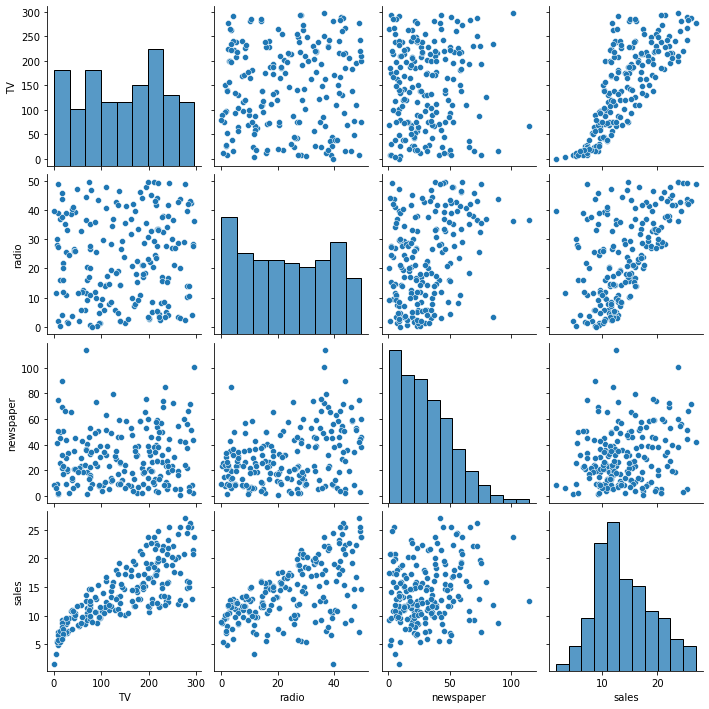

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### Checking the Outliers for the Independent variables (X1,X2,X3 = TV,radio,newspaper)

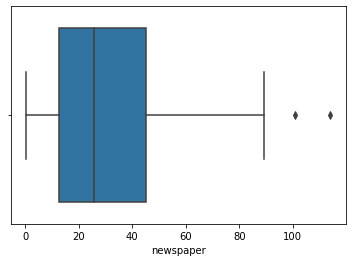

In [47]:
sns.boxplot(x=df['newspaper'])
plt.show()

In [49]:
from feature_engine.outliers import Winsorizer

Win = Winsorizer(capping_method ='iqr',tail ='both',
                fold = 1.5, variables = ['newspaper'])


df_Win = Win.fit_transform(df[['newspaper']])
df_Win

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


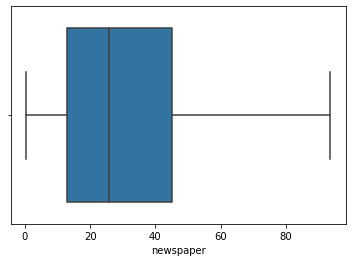

In [50]:
sns.boxplot(x=df_Win['newspaper'])
plt.show()

In [51]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
# x = df[['TV', 'radio','newspaper']]
# y = df['sales']

In [52]:
x =  df.drop(columns= 'sales')
y = df['sales']

In [54]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [55]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.33, random_state=42)

In [57]:
#import
from sklearn.linear_model import LinearRegression

#save the model
model = LinearRegression()

#fit
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
#print intercept (b0)
model.intercept_

2.7580716192171053

In [15]:
#print intercept (b1)
model.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [16]:
#Predictions

In [17]:
train_predictions = model.predict(X_train)

In [18]:
test_predictions = model.predict(X_test)

In [19]:
#Evaluation

In [20]:
from sklearn.metrics import mean_squared_error
test_RMSE = np.sqrt(mean_squared_error(Y_test,test_predictions))
train_RMSE= np.sqrt(mean_squared_error(Y_train,train_predictions))
print(train_RMSE,test_RMSE)

1.5526939990087725 1.93078438223472


In [21]:
model.score(X_test,Y_test)   # Test R2

0.8555568430680087

In [22]:
model.score(X_train,Y_train)   #Train R2

0.9095216639030753

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print(scores)

cv_score = scores.mean()
print("Cross Validation Score",cv_score)

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Cross Validation Score 0.8871063495438435


In [24]:
test_res = Y_test - test_predictions
test_res

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

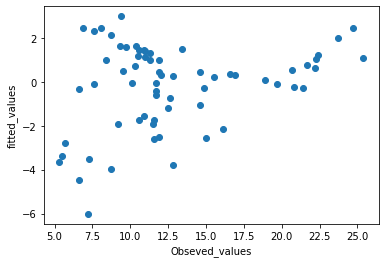

In [25]:
plt.scatter(Y_test,test_res)
plt.xlabel("Obseved_values")
plt.ylabel("fitted_values")
plt.show()

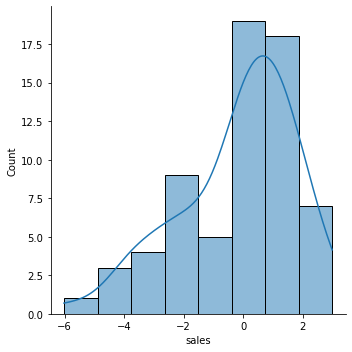

In [26]:
sns.displot(test_res,kde=True)      #Normality of errors  === Left skwed distribution


plt.show()

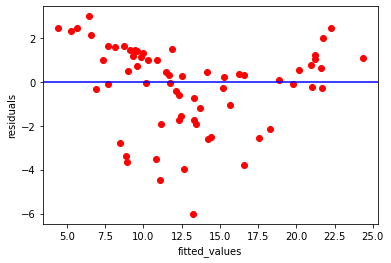

In [27]:
plt.scatter(test_predictions,test_res,c="r")    #Un-equal  variance of Errors
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [28]:
# Assumption has been failed

In [29]:
## Variables Significance 

In [30]:
import statsmodels.formula.api as smf
m= smf.ols("y~x",data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        10:11:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
x[0]           0.0458      0.001     32.809      0.000       0.043       0.049
x[1]           0.1885      0.009     21.893      0.000       0.172       0.206
x[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking whether datahas nay influential values by using influence index plots

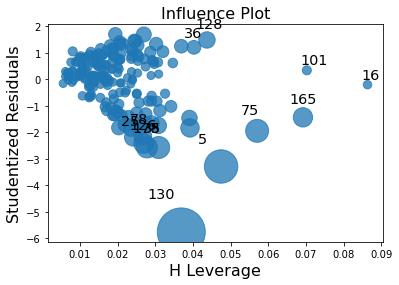

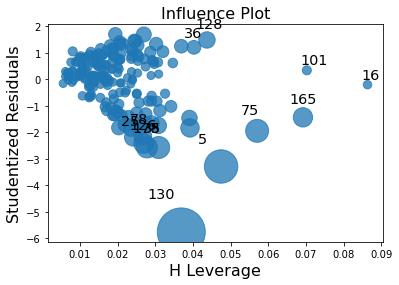

In [31]:
import statsmodels.api as sm
sm.graphics.influence_plot(m)

In [32]:
#130 is having high impact

In [33]:
df.iloc[130]

TV            0.7
radio        39.6
newspaper     8.7
sales         1.6
Name: 130, dtype: float64

In [34]:
#index 130 is showing high influence so we can exclude the entire row

In [35]:
df_new = df.drop(df.index[[130]],axis = 0)
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [36]:
lm= smf.ols(formula = 'sales ~ TV+ radio + newspaper',data= df_new).fit()
lm.summary()

#use this method to check or VIF

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          1.88e-101
Time:                        10:11:41   Log-Likelihood:                -369.13
No. Observations:                 199   AIC:                             746.3
Df Residuals:                     195   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0931      0.290     10.654      0.000       2.520       3.666
TV             0.0448      0.001     34.425      0.000       0.042       0.047
radio          0.1939      0.008     24.130      0.000       0.178       0.210
newspaper     -0.0043      0.005     -0.777      0.438      -0.015       0.007
==============================================================================
Omnibus:                       21.217   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.630
Skew:                          -0.835   Prob(JB):                     4.48e-06
Kurtosis:                       3.423   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Variance Inflation Factor(VIF)**

In [37]:
rsq_TV = smf.ols('TV~radio+newspaper',data=df).fit()
rsq_TV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4542
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.636
Time:                        10:11:41   Log-Likelihood:                -1173.4
No. Observations:                 200   AIC:                             2353.
Df Residuals:                     197   BIC:                             2363.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.5690     12.615     10.826      0.000     111.692     161.446
radio          0.2298      0.440      0.523      0.602      -0.637       1.097
newspaper      0.1679      0.300      0.560      0.576      -0.423       0.759
==============================================================================
Omnibus:                       93.855   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.314
Skew:                          -0.089   Prob(JB):                      0.00212
Kurtosis:                       1.798   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
rsq_radio = smf.ols('radio~TV+newspaper',data=df).fit()
rsq_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  radio   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.28
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.62e-06
Time:                        10:11:41   Log-Likelihood:                -809.31
No. Observations:                 200   AIC:                             1625.
Df Residuals:                     197   BIC:                             1635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0430      2.348      6.408      0.000      10.413      19.673
TV             0.0060      0.012      0.523      0.602      -0.017       0.029
newspaper      0.2401      0.045      5.280      0.000       0.150       0.330
==============================================================================
Omnibus:                       24.135   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.505
Skew:                           0.117   Prob(JB):                       0.0235
Kurtosis:                       2.080   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
rsq_newspaper = smf.ols('newspaper~TV+radio',data=df).fit()
rsq_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              newspaper   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.30
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                        10:11:41   Log-Likelihood:                -885.92
No. Observations:                 200   AIC:                             1778.
Df Residuals:                     197   BIC:                             1788.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1466      3.583      4.786      0.000      10.081      24.212
TV             0.0095      0.017      0.560      0.576      -0.024       0.043
radio          0.5164      0.098      5.280      0.000       0.324       0.709
==============================================================================
Omnibus:                       15.121   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.738
Skew:                           0.610   Prob(JB):                     0.000232
Kurtosis:                       3.723   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Calculating VIF's values of Independent variables
rsq_TV = smf.ols('TV~radio+newspaper',data=df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols('radio~TV+newspaper',data=df).fit().rsquared
vif_radio = 1/(1-rsq_radio)


rsq_newspaper = smf.ols('newspaper~radio+TV',data=df).fit().rsquared
vif_newspaper = 1/(1-rsq_newspaper)


In [42]:
# Storing VIF values in a dataFrame
d1= {'Variables':['TV','radio','newspaper'],'VIF':[vif_TV,vif_radio,vif_newspaper]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


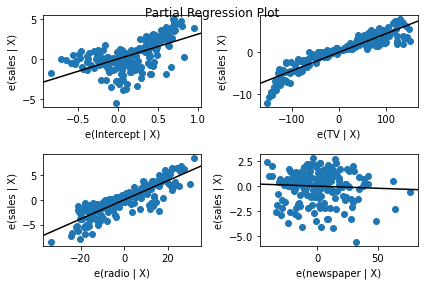

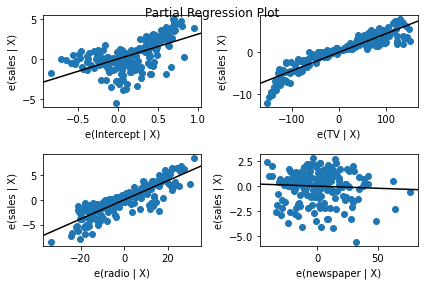

In [43]:
sm.graphics.plot_partregress_grid(lm)

### Final Model including TV and Radio only

In [44]:
final_model = smf.ols(formula= 'sales~TV+radio',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           4.83e-98
Time:                        10:18:14   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""